In [32]:
from utils import *

# 1D Input Function

## Dataset

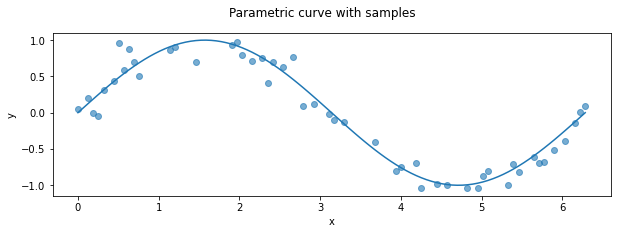

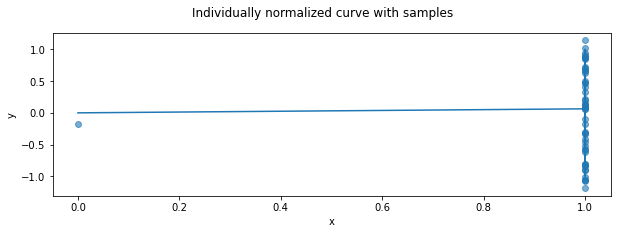

In [33]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

datasets = processing(x, y, noise=0.15)
X, z = datasets['orig']
X_norm, z_norm = datasets['norm']
X_train, z_train, z_train_noisy = datasets['orig train']
X_train_norm, z_train_norm, z_train_norm_noisy = datasets['norm train']

_ = plot(
    (X, X_train), 
    (z.ravel(), z_train_noisy), 
    typ='data', 
    title="Parametric curve with samples"
)
_ = plot(
    (X_norm, X_train_norm), 
    (z_norm.ravel(), z_train_norm_noisy), 
    typ='data', 
    title="Individually normalized curve with samples"
)

## Noiseless

### $\mathbb{R}^d$

NTK     :  8.31**2 * NTK(depth=2, c=2.000, bias=0.000)
Laplace :  0.481**2 * Matern(length_scale=7.23, nu=0.5)


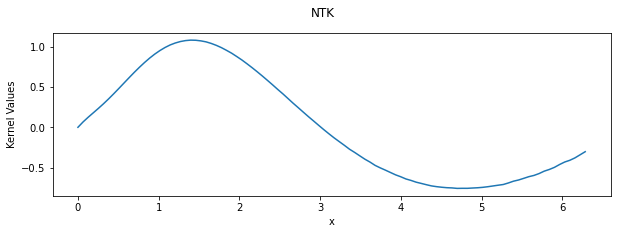

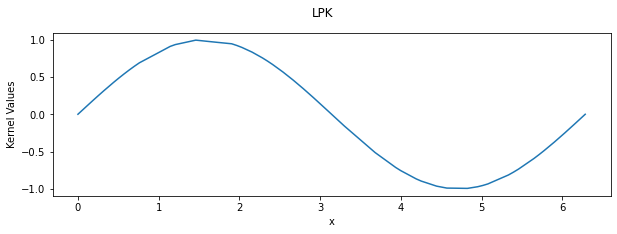

In [34]:
ntk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=2, c=2, 
        bias=1e-1, 
        bias_bounds=(1e-9, 1e1)
    )
)

lpk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e1) 
    ) * 
    Matern(
        nu=1/2,
        length_scale=10,
        length_scale_bounds=(1e-1, 1e3), 
    ) 
)

gp_ntk = GPR(kernel=ntk, alpha=1e-5, n_restarts_optimizer=9)
gp_ntk.fit(X_train, z_train)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_=plot(X, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=1e-5, n_restarts_optimizer=9)
gp_lpk.fit(X_train, z_train)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_=plot(X, mean_lpk.ravel(), 'kernel', title='LPK')

## Sample Paths

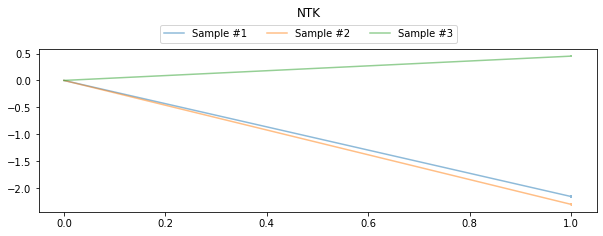

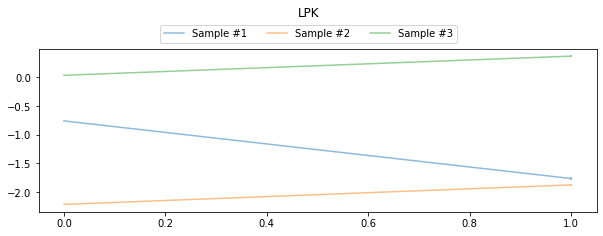

In [35]:
ntk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=2, c=2, 
        bias=1e-9, 
        bias_bounds='fixed'#(1e-9, 1e2)
    ) 
)

lpk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-3, 1e3)
    ) * Matern(
        nu=1/2,
        length_scale=2,
        length_scale_bounds='fixed'#(1e-1, 1e3), 
    ) 
)

data = X_norm
samples = 3

gp_ntk_sample = GPR(kernel=ntk)
mean_ntk_sample = gp_ntk_sample.predict(data)
samples_ntk = gp_ntk_sample.sample_y(data, samples)
_=plot(data, samples_ntk.T, 'sample', title='NTK')

gp_lpk_sample = GPR(kernel=lpk)
mean_lpk_sample = gp_lpk_sample.predict(data)
samples_lpk = gp_lpk_sample.sample_y(data, samples)
samples_lpk = np.squeeze(samples_lpk)
_=plot(data, samples_lpk.T, 'sample', title='LPK')

# 2D Input Function

## Dataset

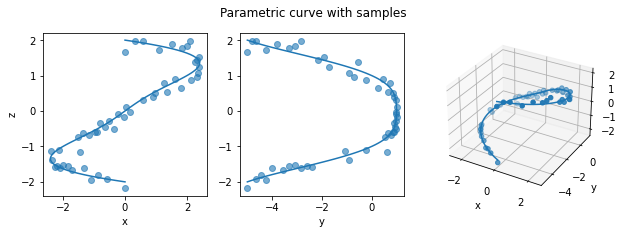

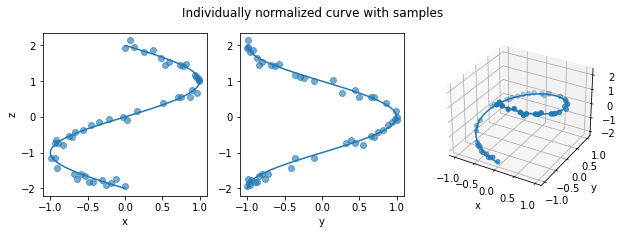

In [36]:
z = np.linspace(-2, 2, 100)
x = (z**2 + 1) * np.sin(np.linspace(-np.pi, np.pi, 100))
y = (z**2 + 1) * np.cos(np.linspace(-np.pi, np.pi, 100))

datasets = processing(x, y, z, noise=0.15)

X, z = datasets['orig']
X_norm, z_norm = datasets['norm']
X_train, z_train, z_train_noisy = datasets['orig train']
X_train_norm, z_train_norm, z_train_norm_noisy = datasets['norm train']

_ = plot(
    (X, X_train), 
    (z.ravel(), z_train_noisy), 
    typ='data', 
    title="Parametric curve with samples"
)
_ = plot(
    (X_norm, X_train_norm), 
    (z_norm.ravel(), z_train_norm_noisy), 
    typ='data', 
    title="Individually normalized curve with samples"
)

In [37]:
# x should not be noisy
# when "normalizing" it should be done by whole coordinates, not features

## Noiseless

### $\mathbb{R}^d$

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


NTK     :  0.268**2 * NTK(depth=2, c=2.000, bias=0.002) * WhiteKernel(noise_level=0.822)
Laplace :  0.568**2 * Matern(length_scale=1.23, nu=0.5) * WhiteKernel(noise_level=5.06)


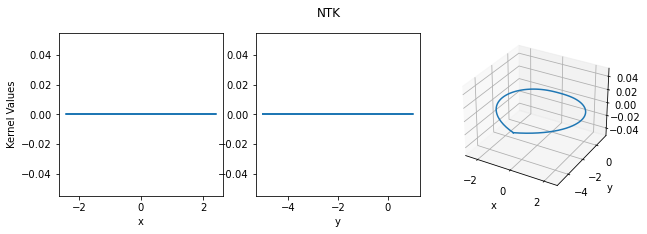

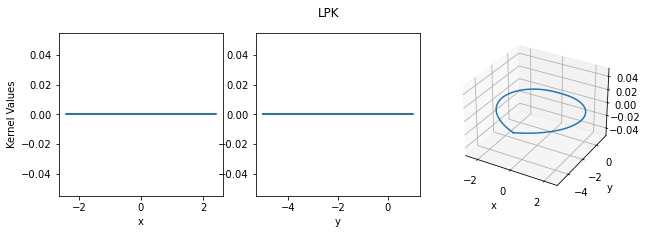

In [68]:
ntk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e1)
    ) * 
    NTK(depth=2, c=2, 
        bias=1e-1, 
        bias_bounds=(1e-9, 1e0)
    ) 
    * WhiteKernel(
        noise_level=0.05, 
        noise_level_bounds=(1e-9, 1e1)
    )
)

lpk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e1) 
    ) * 
    Matern(
        nu=1/2,
        length_scale=10,
        length_scale_bounds=(1e-1, 1e3), 
    ) 
    * WhiteKernel(
        noise_level=0.05, 
        noise_level_bounds=(1e-9, 1e1)
    )
)

gp_ntk = GPR(kernel=ntk, alpha=1e-5, n_restarts_optimizer=9)
gp_ntk.fit(X_train, z_train)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_=plot(X, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=1e-5, n_restarts_optimizer=9)
gp_lpk.fit(X_train, z_train)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_=plot(X, mean_lpk.ravel(), 'kernel', title='LPK')

In [69]:
mean_ntk

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

### $\mathbb{S}^{d-1}$

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


NTK     :  0.845**2 * NTK(depth=2, c=2.000, bias=0.477)


/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Laplace :  1.24**2 * Matern(length_scale=1.59, nu=0.5)


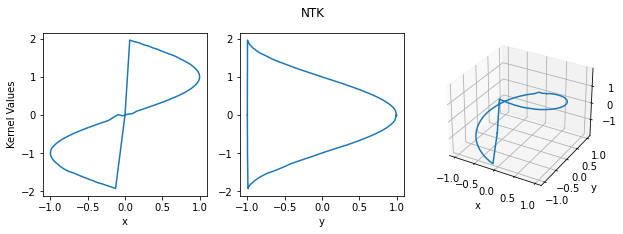

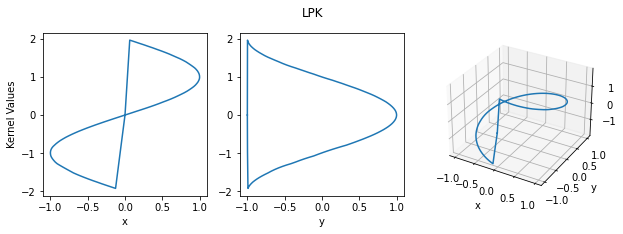

In [51]:
gp_ntk = GPR(kernel=ntk, alpha=1e-5, n_restarts_optimizer=9)
gp_ntk.fit(X_train_norm, z_train_norm)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X_norm)
_=plot(X_norm, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=1e-5, n_restarts_optimizer=9)
gp_lpk.fit(X_train_norm, z_train_norm)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X_norm)
_=plot(X_norm, mean_lpk.ravel(), 'kernel', title='LPK')

## Noisy

### $\mathbb{R}^d$

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__bias is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


NTK     :  0.261**2 * NTK(depth=2, c=2.000, bias=0.000)
Laplace :  1.14**2 * Matern(length_scale=4, nu=0.5)


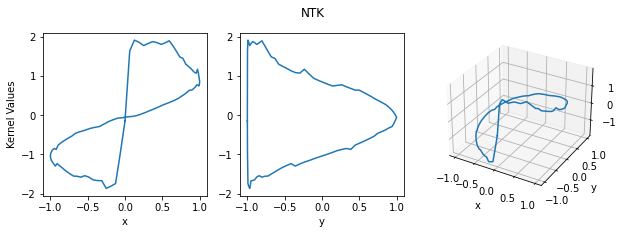

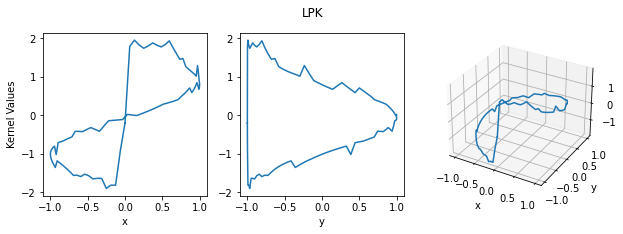

In [61]:
ntk = (
    ConstantKernel(
        constant_value=1.0, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=2, c=2, 
        bias=1e-9, 
        bias_bounds=(1e-9, 1e2)
    ) 
    # * WhiteKernel(
    #     noise_level=0.15, 
    #     noise_level_bounds='fixed'#(1e-9, 1e5)
    # )
)

lpk = (
    ConstantKernel(
        constant_value=1.0, 
        constant_value_bounds=(1e-3, 1e3)
    ) * Matern(
        nu=1/2,
        length_scale=10,
        length_scale_bounds=(1e-1, 1e3), 
    ) 
    # * WhiteKernel(
    #     noise_level=0.1, 
    #     noise_level_bounds='fixed'#(1e-9, 1e5)
    # )
)
# alpha deals with std 
gp_ntk = GPR(kernel=ntk, alpha=.15**2, n_restarts_optimizer=9)
gp_ntk.fit(X_train, z_train_noisy)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X)
_=plot(X_norm, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=.15**2, n_restarts_optimizer=9)
gp_lpk.fit(X_train, z_train_noisy)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X)
_=plot(X_norm, mean_lpk.ravel(), 'kernel', title='LPK')

### $\mathbb{S}^{d-1}$

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


NTK     :  0.843**2 * NTK(depth=2, c=2.000, bias=0.482)
Laplace :  1.25**2 * Matern(length_scale=1.53, nu=0.5)


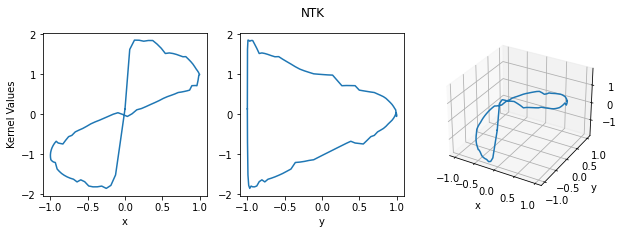

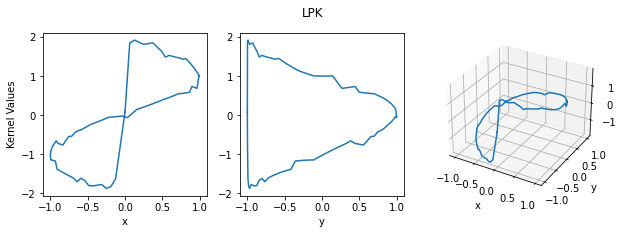

In [57]:
gp_ntk = GPR(kernel=ntk, alpha=0.15**2, n_restarts_optimizer=9)
gp_ntk.fit(X_train_norm, z_train_norm_noisy)
print('NTK     : ', gp_ntk.kernel_)
mean_ntk = gp_ntk.predict(X_norm)
_=plot(X_norm, mean_ntk.ravel(), 'kernel', title='NTK')

gp_lpk = GPR(kernel=lpk, alpha=0.15**2, n_restarts_optimizer=9)
gp_lpk.fit(X_train_norm, z_train_norm_noisy)
print('Laplace : ', gp_lpk.kernel_)
mean_lpk = gp_lpk.predict(X_norm)
_=plot(X_norm, mean_lpk.ravel(), 'kernel', title='LPK')

## Sample Paths

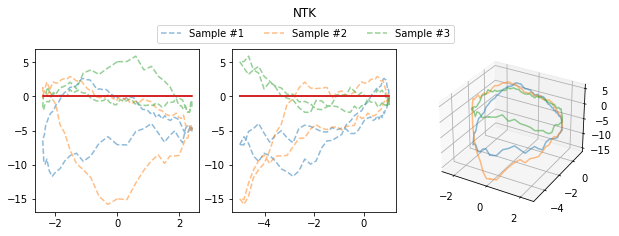

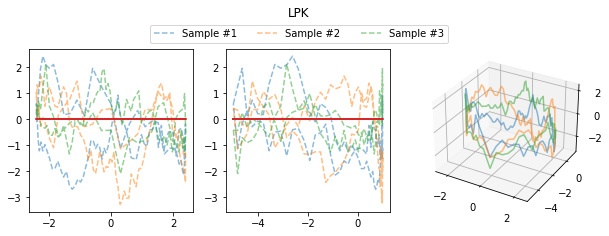

In [49]:
ntk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=2, c=2, 
        bias=1e-9, 
        bias_bounds='fixed'#(1e-9, 1e2)
    ) 
)

lpk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-3, 1e3)
    ) * Matern(
        nu=1/2,
        length_scale=1,
        length_scale_bounds='fixed'#(1e-1, 1e3), 
    ) 
)

data = X
y = 

gp_ntk_sample = GPR(kernel=ntk)
mean_ntk_sample = gp_ntk_sample.predict(data)
samples_ntk = gp_ntk_sample.sample_y(data, 3)
fig1, ax1=plot(data, samples_ntk.T, 'sample', title='NTK')
ax1[0].plot(data[:,0], mean_ntk_sample)
ax1[1].plot(data[:,1], mean_ntk_sample)

gp_lpk_sample = GPR(kernel=lpk)
mean_lpk_sample = gp_lpk_sample.predict(data)
samples_lpk = gp_lpk_sample.sample_y(data, 3)
samples_lpk = np.squeeze(samples_lpk)
fig2, ax2=plot(data, samples_lpk.T, 'sample', title='LPK')
ax2[0].plot(data[:,0], mean_lpk_sample)
ax2[1].plot(data[:,1], mean_lpk_sample)
